In [1]:
import librosa
import matplotlib.pyplot as plt
import noisereduce as nr
import soundfile as sf
from scipy import signal
import numpy as np
import pywt
from scipy.signal import savgol_filter
from IPython.display import Audio
import os

c:\Users\flori\!projects\noise-these\noise-thesis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## removing car noise

In [7]:
# Load an audio file
audio_path = '..\\data\\gopro-noise-data'
output_path = '..\\output'
audio_file = 'SR1.wav'
path = os.path.join(audio_path, audio_file)
path = '..\\data\\may-collection-raw\\121648-recording5.wav'
audio_data, sample_rate = librosa.load(path)
print(len(audio_data), sample_rate, len(audio_data)/sample_rate/60)

47448334 22050 35.864198034769466


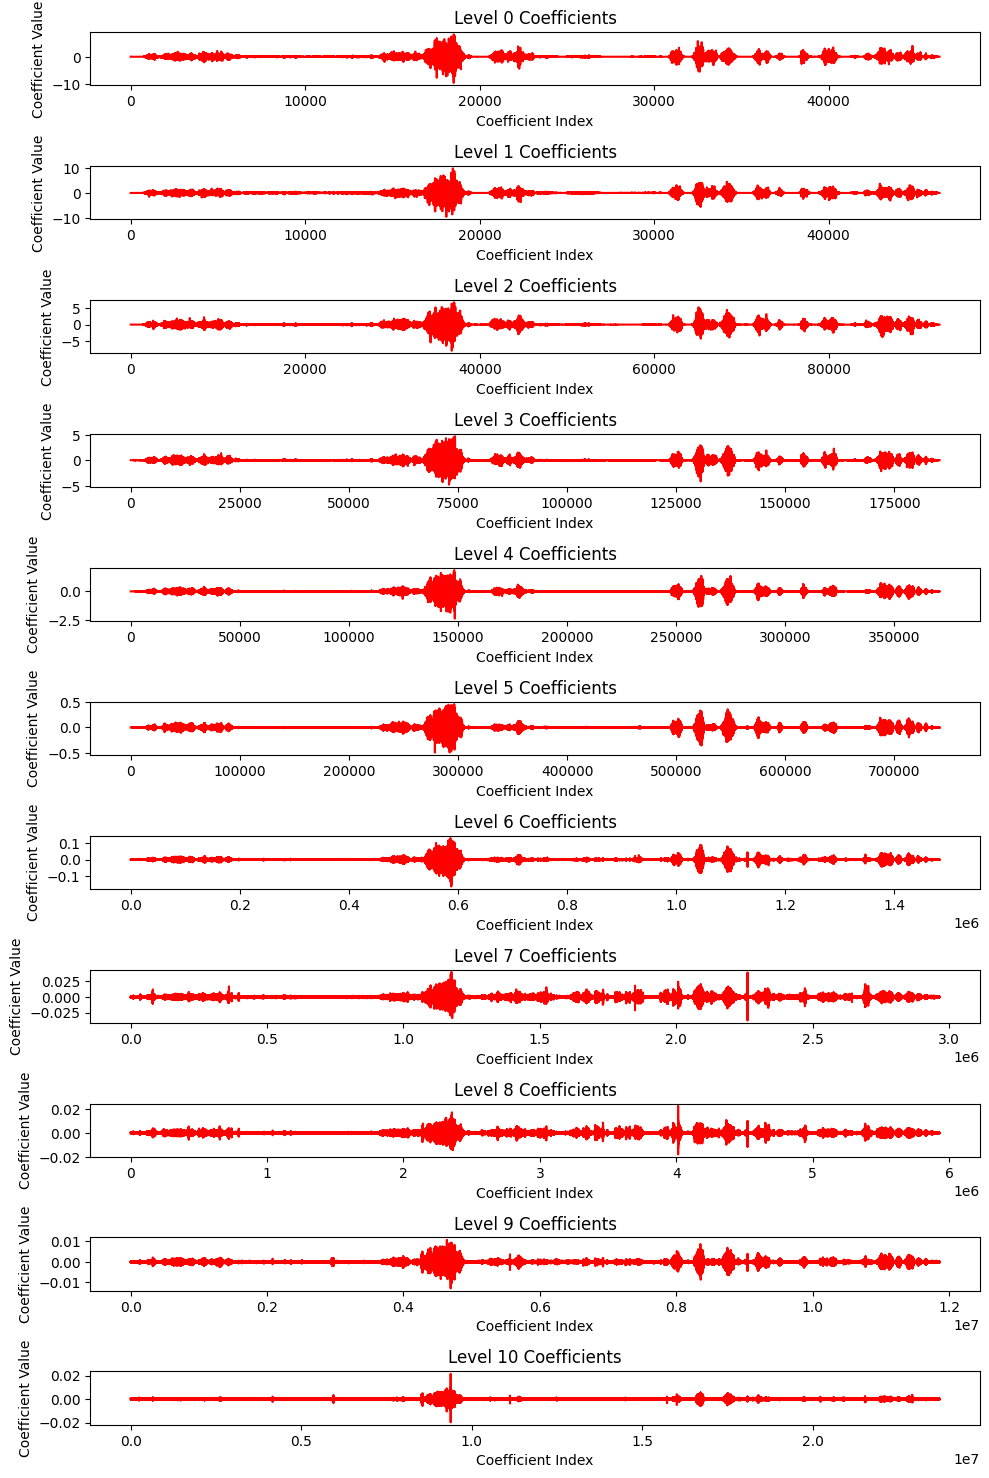

In [4]:
# Define wavelet parameters
wavelet_name = 'db12'  # Choose a wavelet, such as Daubechies 4
level = 10  # Decomposition level

# Perform wavelet transform
coeffs = pywt.wavedec(audio_data, wavelet_name, level=level)

# Plot the wavelet coefficients
plt.figure(figsize=(10, 16))

# Plot wavelet coefficients
for i in range(level):
    plt.subplot(level + 2, 1, i + 2)
    plt.plot(coeffs[i], color='r')
    plt.title(f'Level {i} Coefficients')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')

# Plot approximation coefficients at the highest level
plt.subplot(level + 2, 1, level + 2)
plt.plot(coeffs[level], color='r')
plt.title(f'Level {level} Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()

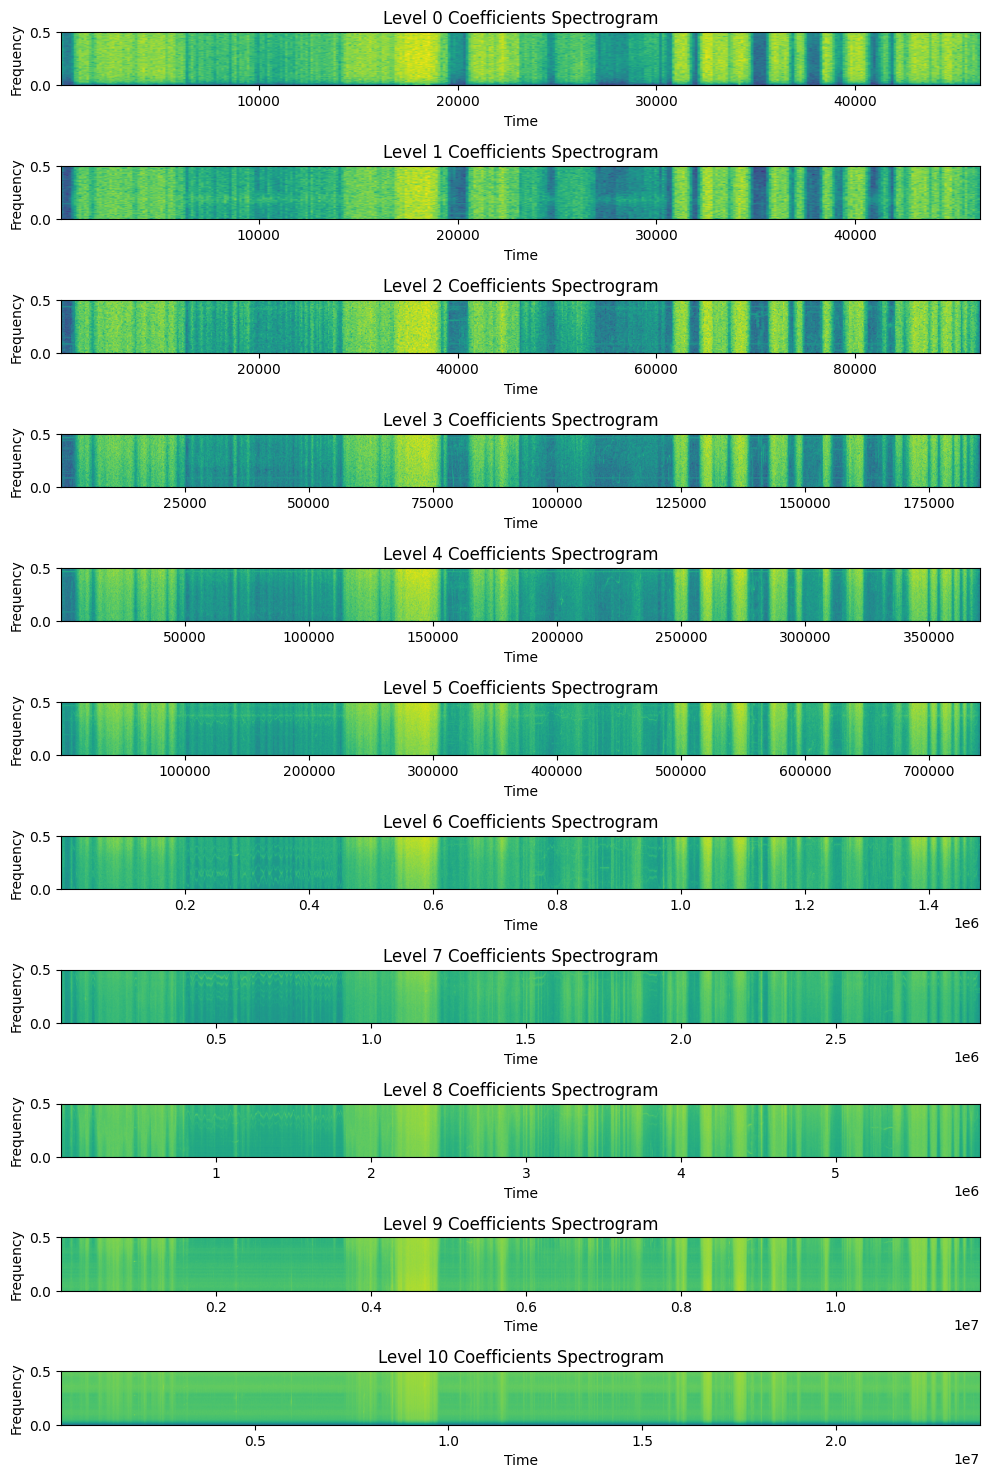

In [5]:
# Plot the spectrogram of wavelet coefficients
plt.figure(figsize=(10, 16))

# Plot spectrogram of wavelet coefficients
for i in range(level):
    plt.subplot(level + 2, 1, i + 2)
    plt.specgram(coeffs[i], Fs=1)
    plt.title(f'Level {i} Coefficients Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')

# Plot spectrogram of approximation coefficients at the highest level
plt.subplot(level + 2, 1, level + 2)
plt.specgram(coeffs[level], Fs=1)
plt.title(f'Level {level} Coefficients Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

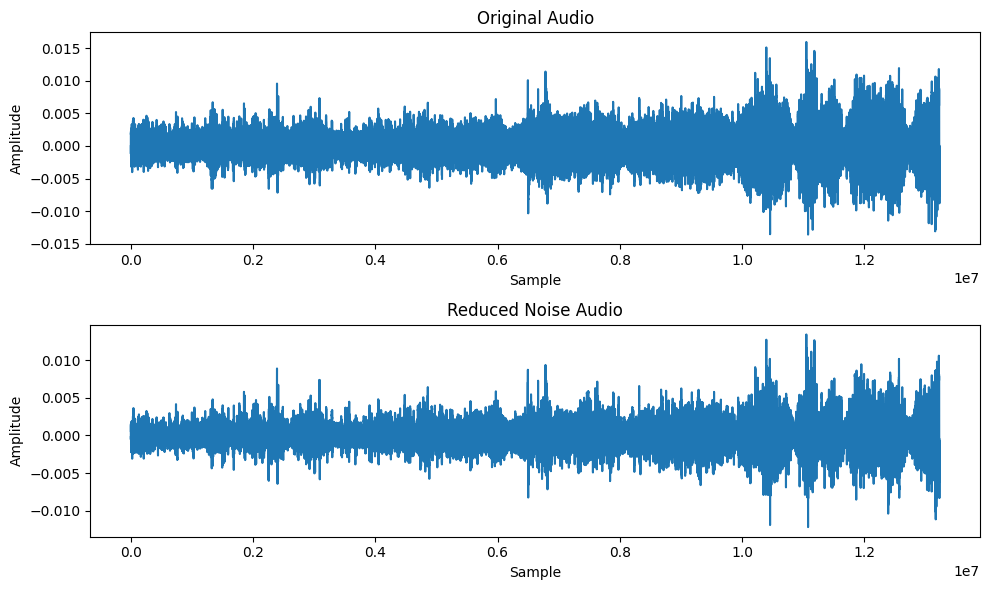

In [5]:
# Apply filtering (attenuate the approximation coefficients)
filtered_coeffs = coeffs[0:2] + [np.zeros_like(coeffs[2])] + [np.zeros_like(coeffs[3])] + [np.zeros_like(coeffs[4])] + coeffs[5:11]

# Reconstruct signal using inverse wavelet transform
reconstructed_signal = pywt.waverec(filtered_coeffs, wavelet_name)

# Plot original and reduced noise data
plt.figure(figsize=(10, 6))

# Plot original audio
plt.subplot(2, 1, 1)
plt.title('Original Audio')
plt.plot(audio_data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot reduced noise audio
plt.subplot(2, 1, 2)
plt.title('Reduced Noise Audio')
plt.plot(reconstructed_signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

SR1_filteredo.wav
..\output\SR1_filteredo.wav


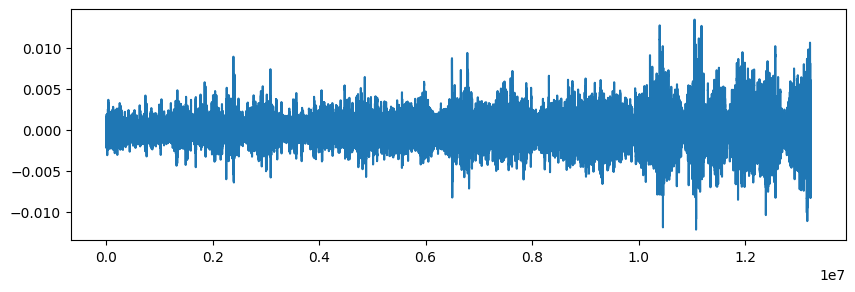

In [21]:
# Save the denoised audio
new_file_name = f'{audio_file.split('.')[0]}_filteredo.wav'
print(new_file_name)
sf.write(os.path.join(output_path, new_file_name), 
         reconstructed_signal, sample_rate)
audio_data2, sample_rate = librosa.load(os.path.join(output_path, new_file_name))
print(os.path.join(output_path, new_file_name))
plt.figure(figsize=(10, 3))
plt.plot(audio_data2)


In [10]:
# Save the difference audio
difference = audio_data - reconstructed_signal
new_file_name = f'{audio_file.split('.')[0]}_filteredo.wav'
sf.write(os.path.join(output_path, new_file_name),
         difference, sample_rate)

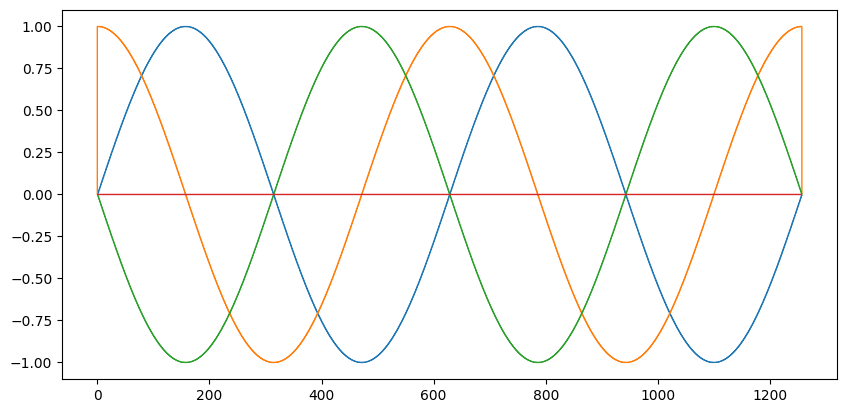

In [20]:
x = np.arange(0,4*np.pi, 0.01)
sin = [np.sin(i) for i in x]
cos = [np.cos(i) for i in x]
neg_sin = [-np.sin(i) for i in x]


combined = [sin[i] + neg_sin[i] for i in range(len(x))]

plt.figure().set_figwidth(10)
plt.stairs(sin)
plt.stairs(cos)
plt.stairs(neg_sin)
plt.stairs(combined)

Audio(data=sin, rate=100*2*np.pi)